In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import TargetEncoder
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet

import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import normalize

I can try:

- Delete outliers (Isolation Forest)

- Take only Moscow

- Aggregate by the station and metro line (how?)


In [65]:
path = 'C:\Work_life\HSE_and_study\Downloads\\tumbochkina\data.csv'

In [66]:
df = pd.read_csv(path)
df = df.reset_index(drop=True)
df.head(3)

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.6,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.2,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.7,16.2,13.1,10.0,25,Cosmetic


In [67]:
df = df[df['Region'] == 'Moscow']
df['Metro station'] = (df['Metro station']).apply( lambda x: x.strip() )

df.drop('Region', axis=1, inplace=True)

In [68]:
df.describe()

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors
count,1.611300e+04,16113.000000,16113.000000,16113.000000,16113.000000,16113.000000,16113.000000,16113.000000
mean,4.798348e+07,12.535344,2.222057,81.922181,43.884596,13.594830,9.119531,16.421833
std,9.573436e+07,6.790625,1.671017,78.197326,43.645793,8.625711,8.272039,11.254795
min,1.150000e+06,0.000000,0.000000,6.000000,2.000000,1.000000,1.000000,1.000000
25%,1.020000e+07,7.000000,1.000000,38.800000,18.000000,8.700000,3.000000,9.000000
50%,1.595000e+07,12.000000,2.000000,60.000000,31.900000,11.300000,7.000000,14.000000
75%,4.000000e+07,17.000000,3.000000,93.300000,51.000000,16.200000,13.000000,20.000000
max,2.455020e+09,60.000000,12.000000,1117.000000,566.800000,122.000000,92.000000,97.000000


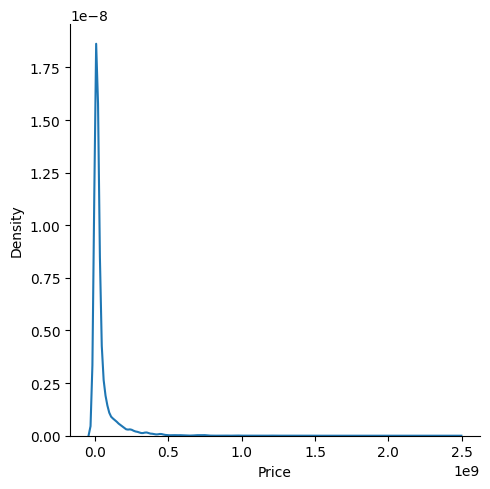

In [47]:
sns.displot((df['Price']), kind='kde')

In [48]:
# df = df[df['Area'] <= 90]
df = df[df['Number of rooms'] <= 10]
df = df[df['Price'] < 0.16e+08]
df = df[df['Number of rooms'] > 0]
df = df[df['Living area'] > 4]
df.describe()

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors
count,5.730000e+03,5730.000000,5730.000000,5730.000000,5730.000000,5730.000000,5730.000000,5730.000000
mean,1.115665e+07,14.550262,1.769634,48.798825,25.237155,11.145602,9.143630,14.664223
std,2.505980e+06,6.430531,1.025586,14.263150,9.760574,3.760157,6.283448,5.828047
min,4.000000e+06,1.000000,1.000000,12.500000,5.700000,1.900000,1.000000,2.000000
25%,8.890600e+06,10.000000,1.000000,38.400000,17.525000,9.000000,4.000000,11.000000
50%,1.113200e+07,13.000000,2.000000,44.560000,24.400000,10.400000,8.000000,14.000000
75%,1.305954e+07,19.000000,2.000000,60.290000,32.700000,12.400000,13.000000,16.000000
max,1.600000e+07,58.000000,7.000000,107.000000,60.100000,36.300000,42.000000,68.000000


In [69]:
columns_to_encode = ['Apartment type', 'Metro station', 'Renovation']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Price'], axis=1), df['Price'], train_size=0.75)

In [71]:
train_cat_features = X_train[columns_to_encode]
X_train.drop(columns=columns_to_encode, axis=1, inplace=True)

test_cat_features = X_test[columns_to_encode]
X_test.drop(columns=columns_to_encode, axis=1, inplace=True)

In [72]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [73]:
TE = TargetEncoder(target_type='continuous')
TE.fit(train_cat_features[columns_to_encode], y_train)
pd.DataFrame(TE.transform(train_cat_features[columns_to_encode]))

,0,1,2
0,5.835754e+07,7.590797e+07,1.151527e+08
1,5.835754e+07,3.045495e+07,3.514077e+07
2,5.835754e+07,5.839434e+07,1.151527e+08
3,5.835754e+07,5.839434e+07,1.151527e+08
4,5.835754e+07,3.556260e+07,7.121882e+07
...,...,...,...
12079,5.835754e+07,2.187810e+07,1.237039e+07
12080,5.835754e+07,1.492994e+07,1.151527e+08
12081,5.835754e+07,2.076576e+07,3.514077e+07
12082,5.835754e+07,3.523065e+07,7.121882e+07


In [74]:
scaler = StandardScaler()
scaler.fit(TE.transform(train_cat_features))

train_cat_features = pd.DataFrame(scaler.transform(TE.transform(train_cat_features))).rename(columns = {0:'Apartment type', 1:'Metro station', 2:'Renovation'})
test_cat_features = pd.DataFrame(scaler.transform(TE.transform(test_cat_features))).rename(columns = {0:'Apartment type', 1:'Metro station', 2:'Renovation'})

In [75]:
'''
TE_OHE = TargetEncoder(target_type='continuous')
TE_OHE.fit(X_train[['Apartment type', 'Renovation']], y_train)

Train_OHE = pd.get_dummies(X_train, columns=['Apartment type', 'Renovation'], dtype=int)
Test_OHE = pd.get_dummies(X_test, columns=['Apartment type', 'Renovation'], dtype=int)
Train_OHE[['Apartment type', 'Renovation']] = pd.DataFrame(TE_OHE.transform(X_train[['Apartment type', 'Renovation']])).astype('float64')
Test_OHE[['Apartment type', 'Renovation']] = pd.DataFrame(TE_OHE.transform(X_test[['Apartment type', 'Renovation']])).astype('float64')


X_train[columns_to_encode] = pd.DataFrame(TE.transform(X_train[columns_to_encode])).astype('float64')
X_test[columns_to_encode] = pd.DataFrame(TE.transform(X_test[columns_to_encode])).astype('float64')
'''

"\nTE_OHE = TargetEncoder(target_type='continuous')\nTE_OHE.fit(X_train[['Apartment type', 'Renovation']], y_train)\n\nTrain_OHE = pd.get_dummies(X_train, columns=['Apartment type', 'Renovation'], dtype=int)\nTest_OHE = pd.get_dummies(X_test, columns=['Apartment type', 'Renovation'], dtype=int)\nTrain_OHE[['Apartment type', 'Renovation']] = pd.DataFrame(TE_OHE.transform(X_train[['Apartment type', 'Renovation']])).astype('float64')\nTest_OHE[['Apartment type', 'Renovation']] = pd.DataFrame(TE_OHE.transform(X_test[['Apartment type', 'Renovation']])).astype('float64')\n\n\nX_train[columns_to_encode] = pd.DataFrame(TE.transform(X_train[columns_to_encode])).astype('float64')\nX_test[columns_to_encode] = pd.DataFrame(TE.transform(X_test[columns_to_encode])).astype('float64')\n"

In [76]:
train_cat_features

,Apartment type,Metro station,Renovation
0,0.536655,0.505458,1.753063
1,0.536655,-0.265822,-0.326480
2,0.536655,0.208274,1.753063
3,0.536655,0.208274,1.753063
4,0.536655,-0.179152,0.611204
...,...,...,...
12079,0.536655,-0.411360,-0.918292
12080,0.536655,-0.529262,1.753063
12081,0.536655,-0.430235,-0.326480
12082,0.536655,-0.184785,0.611204


<Axes: >

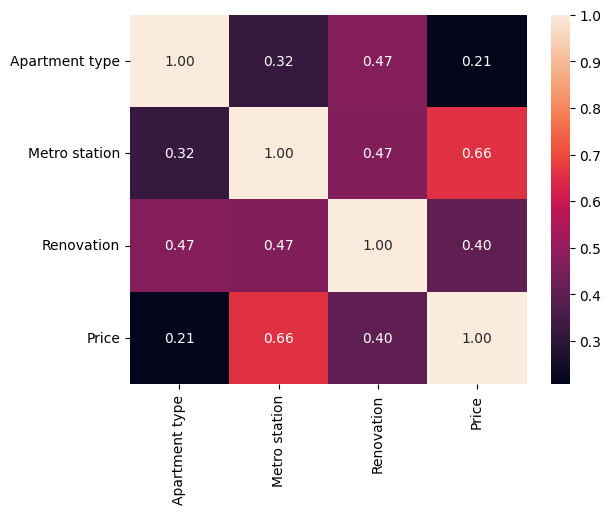

In [77]:
sns.heatmap(pd.concat((train_cat_features, y_train), axis=1).corr(), annot=True, fmt=".2f")

<Axes: >

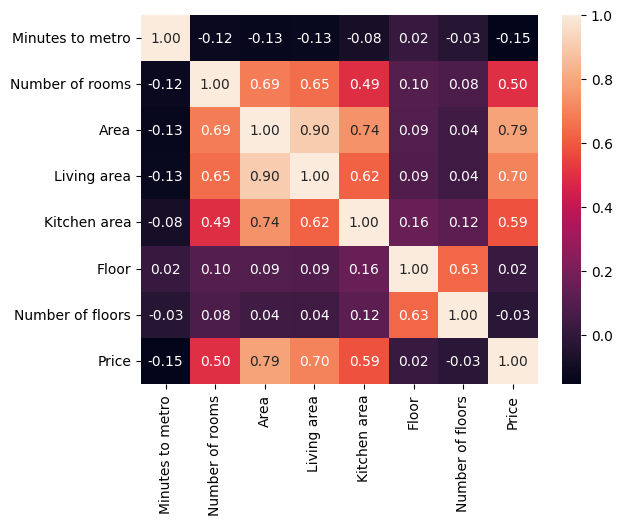

In [78]:
sns.heatmap(pd.concat((X_train, y_train), axis=1).corr(), annot=True, fmt=".2f")

In [79]:
X_train

,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors
0,3.0,0.0,24.1,19.1,5.0,2.0,4
1,18.0,3.0,75.7,40.4,12.9,9.0,14
2,13.0,2.0,82.0,55.0,8.0,16.0,41
3,10.0,4.0,147.4,84.8,18.5,2.0,32
4,11.0,2.0,56.0,29.0,11.0,2.0,20
...,...,...,...,...,...,...,...
12079,4.0,3.0,70.3,49.0,8.0,9.0,12
12080,8.0,0.0,27.7,20.2,8.9,18.0,32
12081,9.0,0.0,20.0,12.2,8.3,1.0,5
12082,12.0,1.0,42.4,14.5,15.4,18.0,5


In [80]:
PF = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

scaler = StandardScaler(with_mean=False)
scaler.fit(PF.fit_transform(X_train))

X_train_pol = pd.DataFrame(scaler.transform(PF.fit_transform(X_train)))
X_test_pol = pd.DataFrame(scaler.transform(PF.transform(X_test)))

In [22]:
'''
X_train_norm = normalize(X_train, axis=1)
X_test_norm = normalize(X_test, axis=1)

for element in X_train.columns:
    X_train[f'{element}^2'] = X_train[element]**2
    X_test[f'{element}^2'] = X_test[element]**2
'''

"\nX_train_norm = normalize(X_train, axis=1)\nX_test_norm = normalize(X_test, axis=1)\n\nfor element in X_train.columns:\n    X_train[f'{element}^2'] = X_train[element]**2\n    X_test[f'{element}^2'] = X_test[element]**2\n"

In [23]:
'''
TSVD = TruncatedSVD(n_components=65)
TSVD.fit(X_train_pol)

X_train_pol = pd.DataFrame(TSVD.transform(X_train_pol))
X_test_pol = pd.DataFrame(TSVD.transform(X_test_pol))
'''

'\nTSVD = TruncatedSVD(n_components=65)\nTSVD.fit(X_train_pol)\n\nX_train_pol = pd.DataFrame(TSVD.transform(X_train_pol))\nX_test_pol = pd.DataFrame(TSVD.transform(X_test_pol))\n'

In [81]:
X_train_pol = pd.concat((X_train_pol, train_cat_features), axis=1)
X_test_pol = pd.concat((X_test_pol, test_cat_features), axis=1)

In [61]:
X_test_pol.sample(4)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,Apartment type,Metro station,Renovation
268,2.042938,1.931952,4.345441,3.471494,3.122573,1.746011,2.725562,0.752827,1.447413,2.105425,...,3.037217,1.411374,1.428224,2.037866,0.734897,1.143715,1.020932,-0.990043,-0.852046,-0.509431
882,2.042938,2.897928,4.979588,3.946758,3.307810,0.952370,2.725562,0.752827,2.171120,2.412678,...,3.453027,1.583792,0.825245,2.158757,0.218647,0.623845,1.020932,-0.990043,-0.852046,-0.509431
111,3.928727,0.965976,2.584078,2.066366,2.116999,0.793641,2.725562,2.784124,1.391743,2.407732,...,1.807868,0.648721,0.440131,1.381604,0.151838,0.519870,1.020932,1.010058,0.669053,-0.509431
620,0.628596,0.965976,3.086925,1.653092,5.160184,1.587283,2.384867,0.071274,0.222679,0.460202,...,1.265507,3.854316,2.145637,2.946703,0.607353,0.909773,0.781651,-0.990043,0.123269,-0.509431


In [62]:
X_test_pol.columns = X_test_pol.columns.astype(str)
X_train_pol.columns = X_train_pol.columns.astype(str)

In [82]:
lin = ElasticNet(max_iter=1000)
lin.fit(X_train_pol, y_train)
prediction = lin.predict(X_test_pol)
print(f"MAE : {mean_absolute_error(y_test, prediction)} \nMAPE : {mean_absolute_percentage_error(y_test, prediction)}")

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

<Axes: >

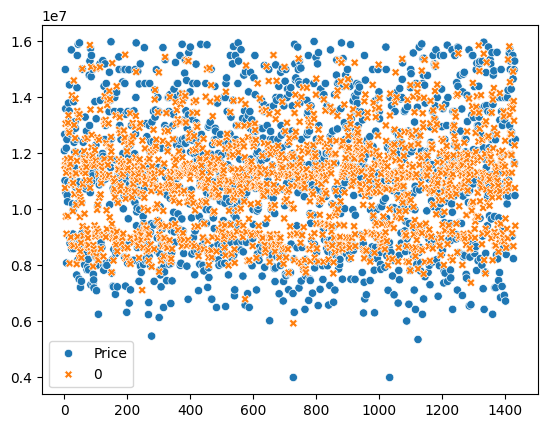

In [28]:
sns.scatterplot(pd.concat((pd.DataFrame(y_test), pd.DataFrame(prediction)), axis=1))

In [83]:
CBR = CatBoostRegressor(verbose=False, iterations=2000, loss_function='RMSE')
CBR.fit(X_train_pol, (y_train))
prediction = CBR.predict(X_test_pol)
print(f"MAE : {mean_absolute_error((y_test),(prediction))} \nMAPE : {mean_absolute_percentage_error(y_test, prediction)}")

MAE : 10375079.276162643 
MAPE : 0.17145486386226863


<Axes: >

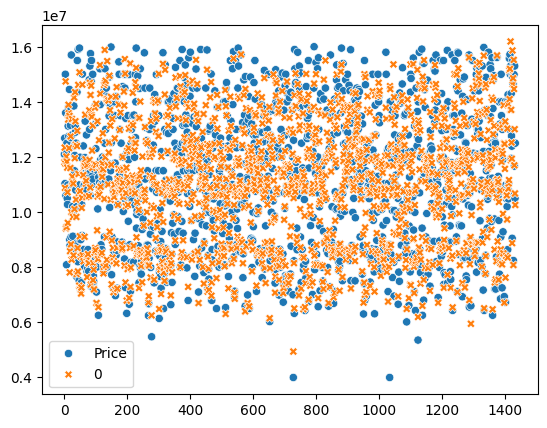

In [30]:
sns.scatterplot(pd.concat((pd.DataFrame(y_test), pd.DataFrame((prediction))), axis=1))

In [31]:
CBR.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 2000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'random_score_type': 'NormalWithModelSizeDecrease',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'lear

In [32]:
params = {
    'learning_rate' : np.arange(0.02, 0.03, 0.002),
    'l2_leaf_reg' : [2, 3, 4],
    'depth' : [4, 6, 7, 8, 9, 10, 12]
}

In [33]:
CV = GridSearchCV(
    estimator=CBR,
    param_grid=params,
    n_jobs=6
)

In [34]:
CV.fit(X_train_pol, y_train)

KeyboardInterrupt: 

In [ ]:
CV.best_params_

In [ ]:
prediction = CV.predict(X_test_pol)
print(f"MAE : {mean_absolute_error((y_test), (prediction))} \nMAPE : {mean_absolute_percentage_error(y_test, prediction)}")

Gotta try the stacking or someshit

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
BR = BaggingRegressor(
    estimator=lin,
    n_estimators=5,
    max_samples=0.5,
    random_state=42
)
BR.fit(X_train_pol, y_train)
prediction = BR.predict(X_test_pol)
print(f"MAE : {mean_absolute_error((y_test), (prediction))} \nMAPE : {mean_absolute_percentage_error(y_test, prediction)}")


MAE : 1043681.2684612917 
MAPE : 0.09777033156451995


In [ ]:
'''
KR = KernelRidge(degree=6)
KR.fit(X_train, y_train)
prediction = KR.predict(X_test)
print(f"MAE : {mean_absolute_error(y_test, prediction)} \nMAPE : {mean_absolute_percentage_error(y_test, prediction)}")
'''

'\nKR = KernelRidge(degree=6)\nKR.fit(X_train, y_train)\nprediction = KR.predict(X_test)\nprint(f"MAE : {mean_absolute_error(y_test, prediction)} \nMAPE : {mean_absolute_percentage_error(y_test, prediction)}")\n'